#Understanding

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt , seaborn as sns
from scipy.stats import norm

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/dimsaditiya/Data-Science/main/Dataset_5%20-%20Travel.csv')
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
df = pd.DataFrame(data)
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [ ]:
df['Customer Type'].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

In [ ]:
df[['Class']].value_counts()

Class   
Business    49665
Eco         46745
Eco Plus     7494
dtype: int64

In [ ]:
df[['Inflight service']].describe()

,Inflight service
count,103904.000000
mean,3.640428
std,1.175663
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [ ]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Data Cleaning

In [ ]:
#Check Duplicated Data
print(df.duplicated().sum())

0


In [ ]:
# Menghilangkan Column yang tidak berguna
dataset = df.drop(columns='Unnamed: 0')
dataset

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
#Mencari Variable yang memiliki missing value
dataset.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [ ]:
#Mencari Rows mana saja yang memiliki missing values tersebut
dataset[dataset['Arrival Delay in Minutes'].isna()]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,5,5,5,5,5,2,4,1,1,5,31,NaN,satisfied
1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,4,3,4,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,2,4,3,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,2,3,2,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,5,2,5,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,3,2,3,3,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,3,3,3,3,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,1,5,1,3,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,1,5,4,5,5,1,5,5,5,3,5,0,NaN,satisfied


In [ ]:
#Mengisi Data yang null
dataset['Arrival Delay in Minutes'].fillna(dataset['Arrival Delay in Minutes'].median(), inplace=True)
dataset.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

# Exploratory Data

## Univariate Analysis

### Satisfaction Data Frame

In [ ]:
# DataFrame untuk Satisfaction = Satisfied 
satisfaction_1 = dataset[dataset['satisfaction']=='satisfied']
satisfaction_1.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.0,satisfied
13,83502,Male,Loyal Customer,33,Personal Travel,Eco,946,4,2,4,3,4,4,4,4,4,5,2,2,2,4,0,0.0,satisfied
16,71142,Female,Loyal Customer,26,Business travel,Business,2123,3,3,3,3,4,4,4,4,5,3,4,5,4,4,49,51.0,satisfied


In [ ]:
# DataFrame untuk Satisfaction = Neutral
satisfaction_0 = dataset[dataset['satisfaction']=='neutral or dissatisfied']
satisfaction_0.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied


### Analysis of Satisfaction

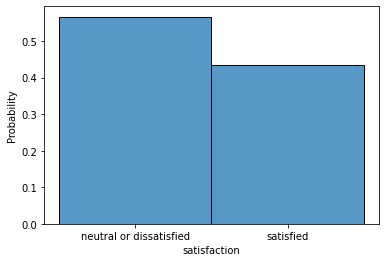

In [ ]:
# Probabilitiy Mass Function Satisfaction
sns.histplot(data=dataset, x='satisfaction',stat="probability")                                       
plt.show()

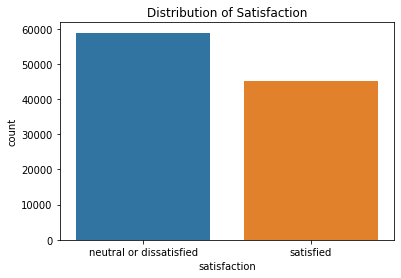

In [ ]:
sns.countplot(x ='satisfaction', data = dataset)
plt.title("Distribution of Satisfaction")
plt.show()

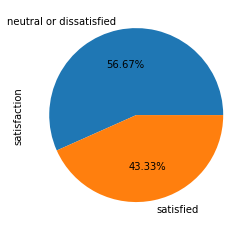

In [ ]:
#Check total Satisfaction
pie_chart_satisfaction = dataset['satisfaction'].value_counts()
pie_chart_satisfaction.plot.pie(autopct='%.2f%%')

plt.show()

Satisfaction is the response variable in this dataset. Around 56.67% passengers neutral or dissatisfied and around 43.33% passengers satisfied with airline services. Hence this dataset is a balance dataset and no need to use resampling techniques.

### Analysis of Gender

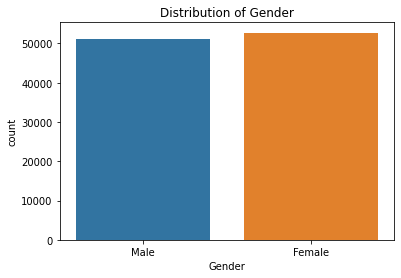

In [ ]:
sns.countplot(x ='Gender', data = dataset)
plt.title("Distribution of Gender")
plt.show()

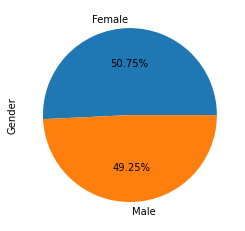

In [ ]:
#Check total Gender
pie_chart_gender = dataset['Gender'].value_counts()
pie_chart_gender.plot.pie(autopct='%.2f%%')

plt.show()

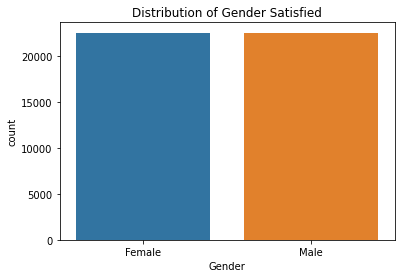

In [ ]:
sns.countplot(x ='Gender', data = satisfaction_1)
plt.title("Distribution of Gender Satisfied")
plt.show()

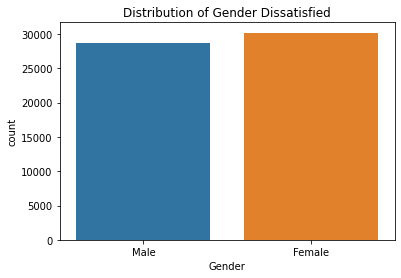

In [ ]:
sns.countplot(x ='Gender', data = satisfaction_0)
plt.title("Distribution of Gender Dissatisfied")
plt.show()

### Analysis of Customer Type

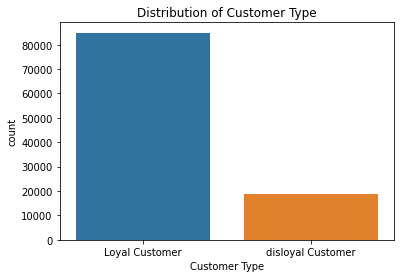

In [ ]:
sns.countplot(x ='Customer Type', data = dataset)
plt.title("Distribution of Customer Type")
plt.show()

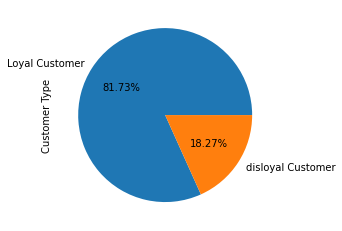

In [ ]:
# Check total Customer Type
pie_chart_customer = dataset['Customer Type'].value_counts()
pie_chart_customer.plot.pie(autopct='%.2f%%')

plt.show()

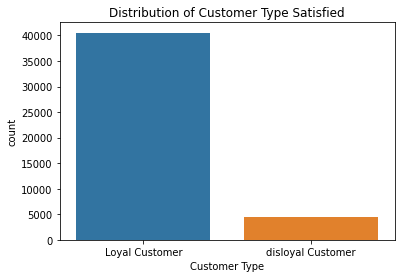

In [ ]:
sns.countplot(x ='Customer Type', data = satisfaction_1)
plt.title("Distribution of Customer Type Satisfied")
plt.show()

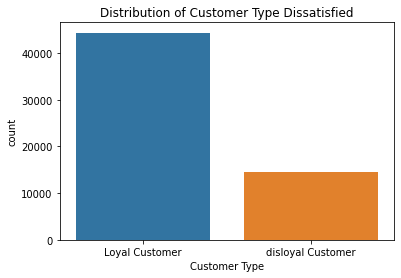

In [ ]:
sns.countplot(x ='Customer Type', data = satisfaction_0)
plt.title("Distribution of Customer Type Dissatisfied")
plt.show()

### Analysis Type of Travel

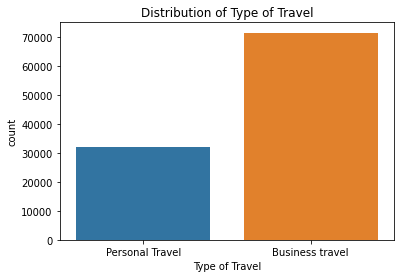

In [ ]:
sns.countplot(x ='Type of Travel', data = dataset)
plt.title("Distribution of Type of Travel")
plt.show()

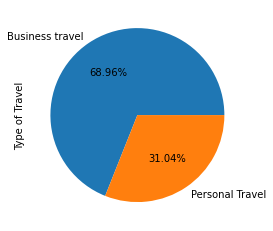

In [ ]:
# Check total Type of Travel
pie_chart_type = dataset['Type of Travel'].value_counts()
pie_chart_type.plot.pie(autopct='%.2f%%')

plt.show()

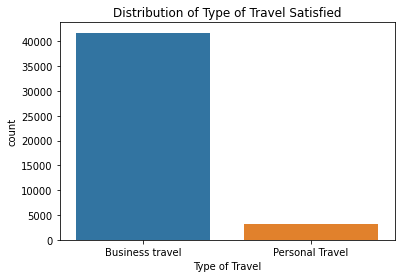

In [ ]:
sns.countplot(x ='Type of Travel', data = satisfaction_1)
plt.title("Distribution of Type of Travel Satisfied")
plt.show()

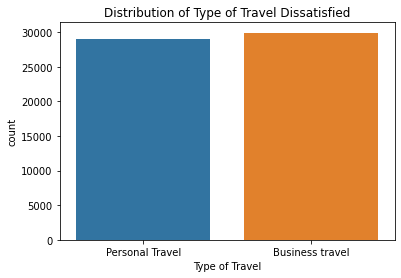

In [ ]:
sns.countplot(x ='Type of Travel', data = satisfaction_0)
plt.title("Distribution of Type of Travel Dissatisfied")
plt.show()

### Analysis of Class

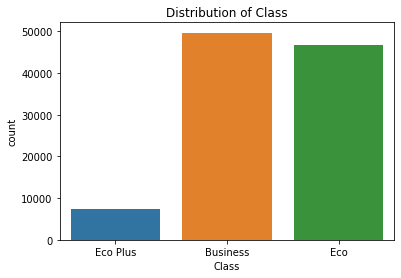

In [ ]:
sns.countplot(x ='Class', data = dataset)
plt.title("Distribution of Class")
plt.show()

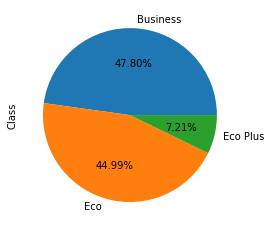

In [ ]:
# Check total Class
pie_chart_class = dataset['Class'].value_counts()
pie_chart_class.plot.pie(autopct='%.2f%%')

plt.show()

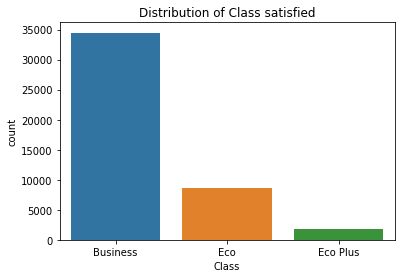

In [ ]:
sns.countplot(x ='Class', data = satisfaction_1)
plt.title("Distribution of Class satisfied")
plt.show()

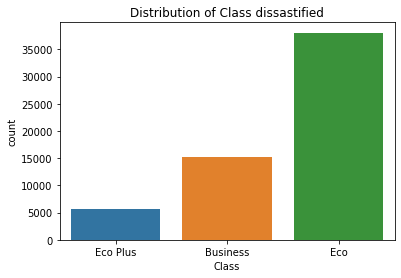

In [ ]:
sns.countplot(x ='Class', data = satisfaction_0)
plt.title("Distribution of Class dissastified")
plt.show()

### Analysis of Inflight wifi service

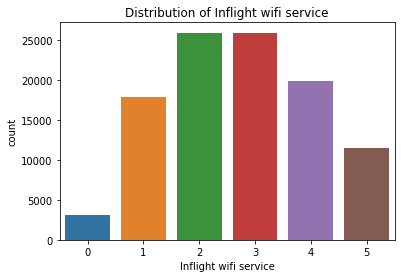

In [ ]:
sns.countplot(x ='Inflight wifi service', data = dataset)
plt.title("Distribution of Inflight wifi service")
plt.show()

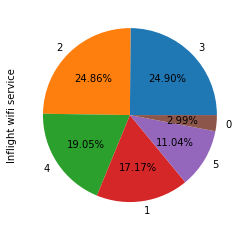

In [ ]:
# Check total Inflight wifi service
pie_chart_inflight = dataset['Inflight wifi service'].value_counts()
pie_chart_inflight.plot.pie(autopct='%.2f%%')

plt.show()

### Analysis of Departure/Arrival time convenient

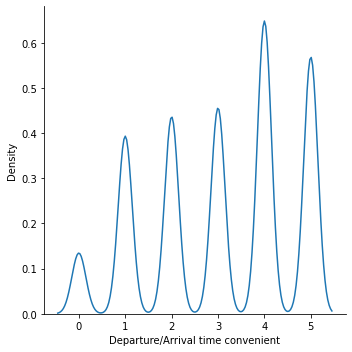

In [ ]:
# Probability Density Function (PDF)
sns.displot(data=dataset, x='Departure/Arrival time convenient', kind="kde")
plt.show()

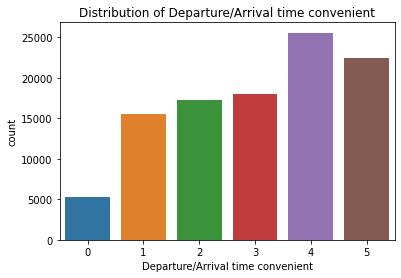

In [ ]:
sns.countplot(x ='Departure/Arrival time convenient', data = dataset)
plt.title("Distribution of Departure/Arrival time convenient")
plt.show()

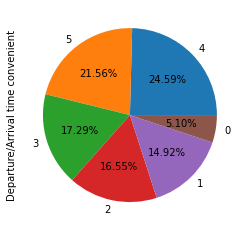

In [ ]:
# Check total Departure/Arrival time convenient
pie_chart_time = dataset['Departure/Arrival time convenient'].value_counts()
pie_chart_time.plot.pie(autopct='%.2f%%')

plt.show()

### Analysis of Ease of Online booking

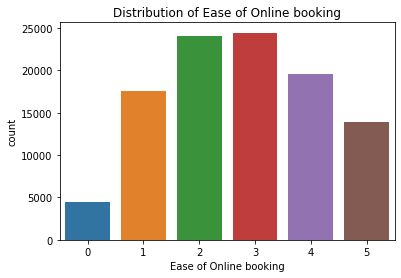

In [ ]:
sns.countplot(x ='Ease of Online booking', data = dataset)
plt.title("Distribution of Ease of Online booking")
plt.show()

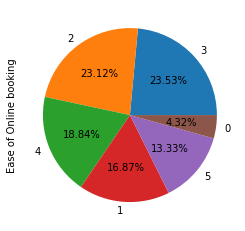

In [ ]:
# Check total Ease of Online booking
pie_chart_ease = dataset['Ease of Online booking'].value_counts()
pie_chart_ease.plot.pie(autopct='%.2f%%')

plt.show()

### Analysis of Gate location

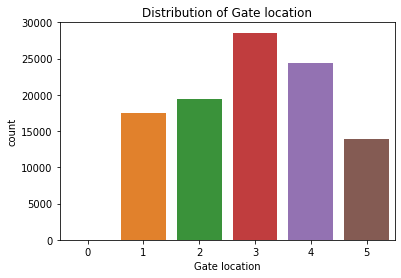

In [ ]:
sns.countplot(x ='Gate location', data = dataset)
plt.title("Distribution of Gate location")
plt.show()

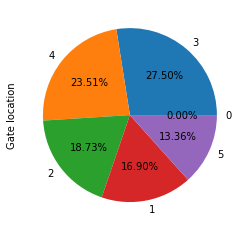

In [ ]:
# Check total Gate location
pie_chart_gate = dataset['Gate location'].value_counts()
pie_chart_gate.plot.pie(autopct='%.2f%%')

plt.show()

### Analysis of Food and drink

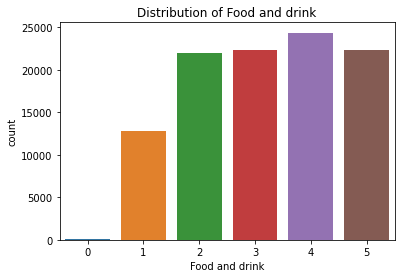

In [ ]:
sns.countplot(x ='Food and drink', data = dataset)
plt.title("Distribution of Food and drink")
plt.show()

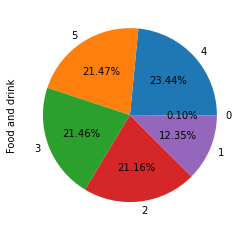

In [ ]:
# Check total Food and drink
pie_chart_food = dataset['Food and drink'].value_counts()
pie_chart_food.plot.pie(autopct='%.2f%%')

plt.show()

### Analysis of Online boarding

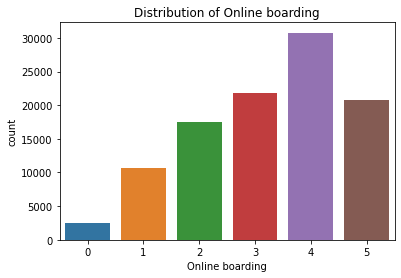

In [ ]:
sns.countplot(x ='Online boarding', data = dataset)
plt.title("Distribution of Online boarding")
plt.show()

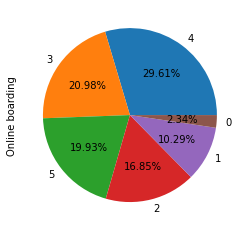

In [ ]:
# Check total Online boarding
pie_chart_online = dataset['Online boarding'].value_counts()
pie_chart_online.plot.pie(autopct='%.2f%%')

plt.show()

### Analysis of Seat comfort

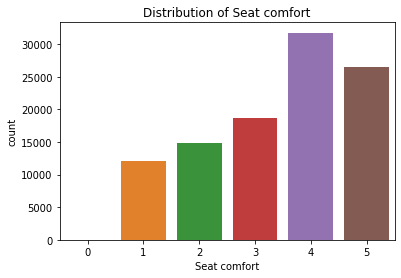

In [ ]:
sns.countplot(x ='Seat comfort', data = dataset)
plt.title("Distribution of Seat comfort")
plt.show()

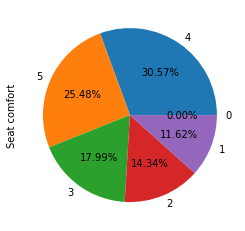

In [ ]:
# Check total Seat comfort
pie_chart_seat = dataset['Seat comfort'].value_counts()
pie_chart_seat.plot.pie(autopct='%.2f%%')

plt.show()

### Analysis of Inflight entertainment

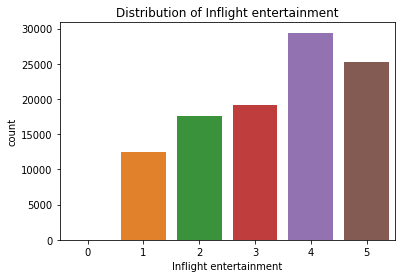

In [ ]:
sns.countplot(x ='Inflight entertainment', data = dataset)
plt.title("Distribution of Inflight entertainment")
plt.show()

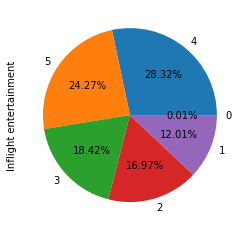

In [ ]:
# Check total Inflight entertainment
pie_chart_inent = dataset['Inflight entertainment'].value_counts()
pie_chart_inent.plot.pie(autopct='%.2f%%')

plt.show()

### Analysis of On-board service

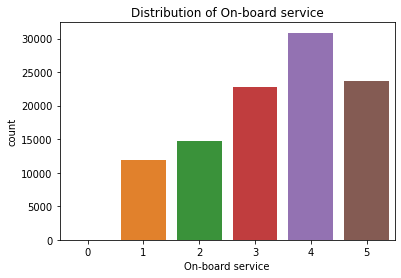

In [ ]:
sns.countplot(x ='On-board service', data = dataset)
plt.title("Distribution of On-board service")
plt.show()

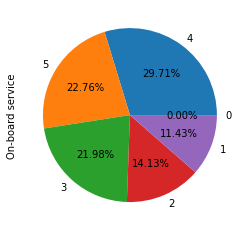

In [ ]:
# Check total On-board service
pie_chart_onboard = dataset['On-board service'].value_counts()
pie_chart_onboard.plot.pie(autopct='%.2f%%')

plt.show()

### Analysis of Leg room service

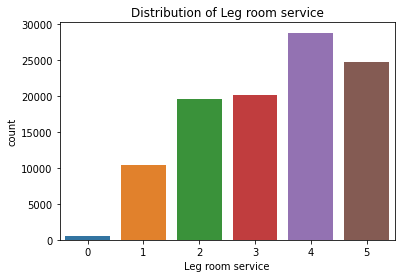

In [ ]:
sns.countplot(x ='Leg room service', data = dataset)
plt.title("Distribution of Leg room service")
plt.show()

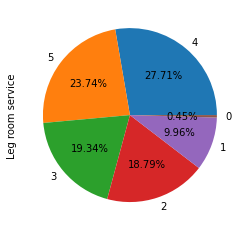

In [ ]:
# Check total Leg room service
pie_chart_leg = dataset['Leg room service'].value_counts()
pie_chart_leg.plot.pie(autopct='%.2f%%')

plt.show()

### Analysis of Baggage handling

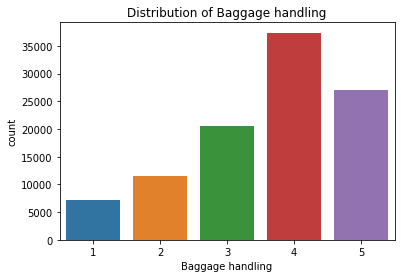

In [ ]:
sns.countplot(x ='Baggage handling', data = dataset)
plt.title("Distribution of Baggage handling")
plt.show()

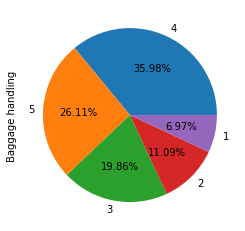

In [ ]:
# Check total Baggage handling
pie_chart_baggage = dataset['Baggage handling'].value_counts()
pie_chart_baggage.plot.pie(autopct='%.2f%%')

plt.show()

### Analysis of Checkin service

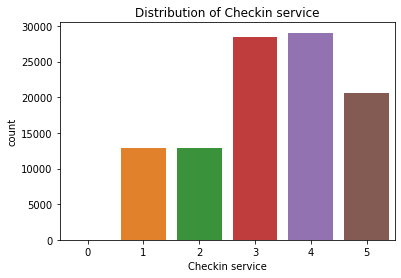

In [ ]:
sns.countplot(x ='Checkin service', data = dataset)
plt.title("Distribution of Checkin service")
plt.show()

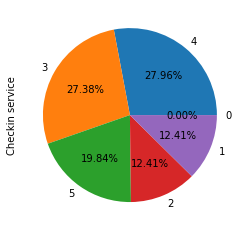

In [ ]:
# Check total Checkin service
pie_chart_checkin = dataset['Checkin service'].value_counts()
pie_chart_checkin.plot.pie(autopct='%.2f%%')

plt.show()

### Analysis of Inflight service

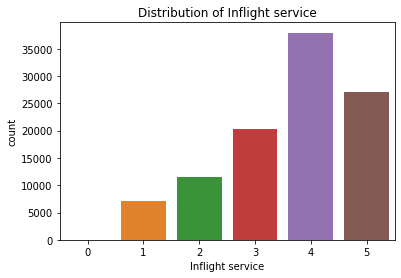

In [ ]:
sns.countplot(x ='Inflight service', data = dataset)
plt.title("Distribution of Inflight service")
plt.show()

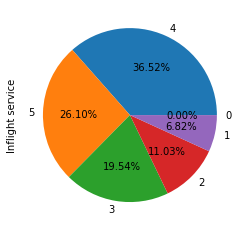

In [ ]:
# Check total Inflight service
pie_chart_inser = dataset['Inflight service'].value_counts()
pie_chart_inser.plot.pie(autopct='%.2f%%')

plt.show()

### Analysis of Cleanliness

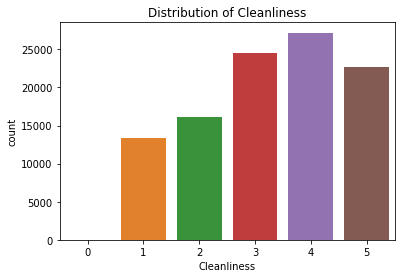

In [ ]:
sns.countplot(x ='Cleanliness', data = dataset)
plt.title("Distribution of Cleanliness")
plt.show()

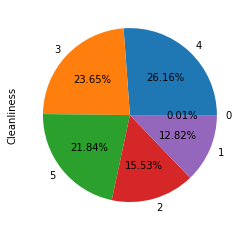

In [ ]:
# Check total Cleanliness
pie_chart_clean = dataset['Cleanliness'].value_counts()
pie_chart_clean.plot.pie(autopct='%.2f%%')

plt.show()

### Analysis of Age

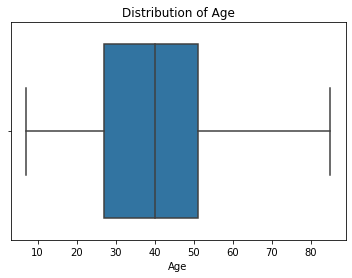

In [ ]:
# Box Plot Age
sns.boxplot(x=dataset['Age'])
plt.title('Distribution of Age')
plt.show()

### Analysis of Flight Distance

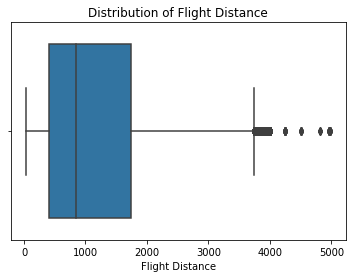

In [ ]:
#Box Plot Flight Distance
sns.boxplot(x=dataset['Flight Distance'])
plt.title('Distribution of Flight Distance')
plt.show()

### Analysis of Departure Delay in Minutes

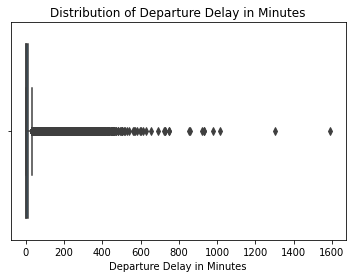

In [ ]:
#Boxplot Departure Delay in Minutes
sns.boxplot(x=dataset['Departure Delay in Minutes'])
plt.title('Distribution of Departure Delay in Minutes')
plt.show()

### Analysis of Arrival Delay in Minutes

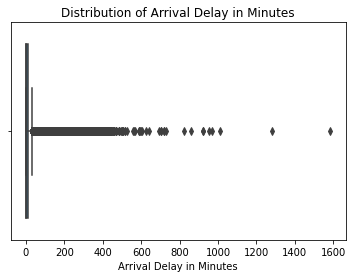

In [ ]:
#Boxplot Arrival Delay in Minutes
sns.boxplot(x=dataset['Arrival Delay in Minutes'])
plt.title('Distribution of Arrival Delay in Minutes')
plt.show()

##Univariate Analysis Outline
Berdasarkan Analisa yang telah dilakukan, dapat disimpulkan bahwa: 
1. Satisfaction response based on dataset is Around 56.67% passengers neutral or dissatisfied and around 43.33% passengers satisfied with airline services. Hence this dataset is a balance dataset and no need to use resampling techniques.
2. There is no Outliers in variable Age, but On the other hand, a large amount of data in "Flight Distance","Departure delay", and "Arrival delay" seem to be outliers.
3. The following are our services based on survey results:
<h1> Services Evaluation </h1>
**The Services is excellent**
*   Gate location
* Food and Drink
* Seat comfort
* Inflight entertainment
* On-board service
* Leg room service
* Checkin service
* Inflight service
* Cleanliness

**The Services need to improve**
* Inflight wifi service with Zero value by 2.99%
* Departure/Arrival time convenient with Zero value by 5.10% although many passengers give a rating of 4
* Ease of online booking with Zero value by 4.32%
* Online boarding with Zero value by 2.34% although many passengers give a rating of 4
* Distribution of Baggage Handling with Zero value by 6.97% although many passengers give a rating of 4


##Bivariate Analysis

### Heatmap Correlation

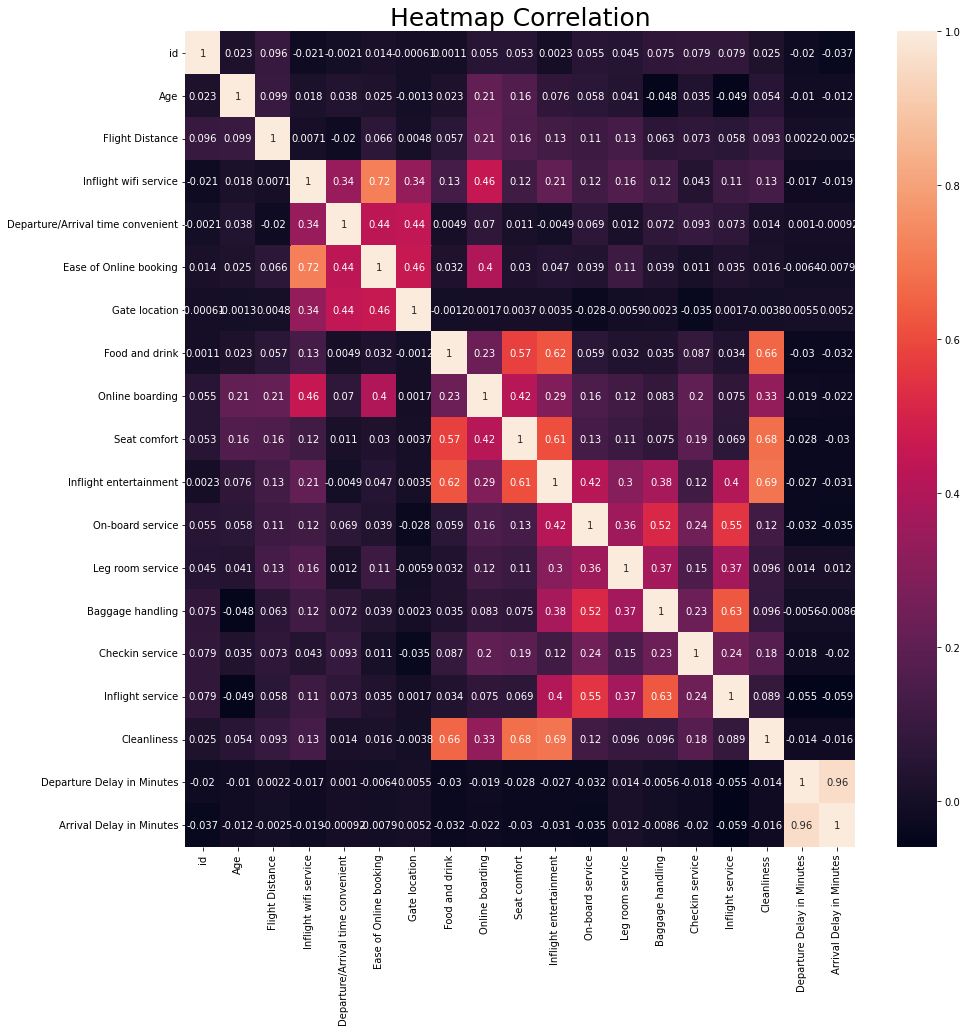

In [ ]:
#Mencari Korelasi antar Variable
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(), annot=True, )
plt.title("Heatmap Correlation", fontsize = 25);
plt.show()

Correlations exist between variables. for examples They are  ease of online booking and in-flight Wi-Fi service, Food and drink and Inflight Entertainment, cleanliness and in-flight entertainment, on-board service and in-flight service.

### Analysis of Satisfaction and Age

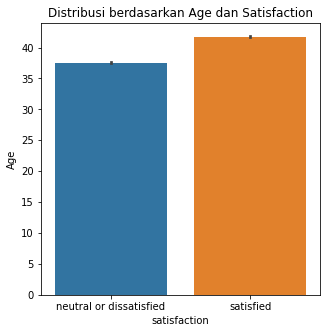

In [ ]:
plt.figure(figsize = (5,5))
sns.barplot(x= 'satisfaction',y = 'Age', data = dataset)
plt.title('Distribusi berdasarkan Age dan Satisfaction')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


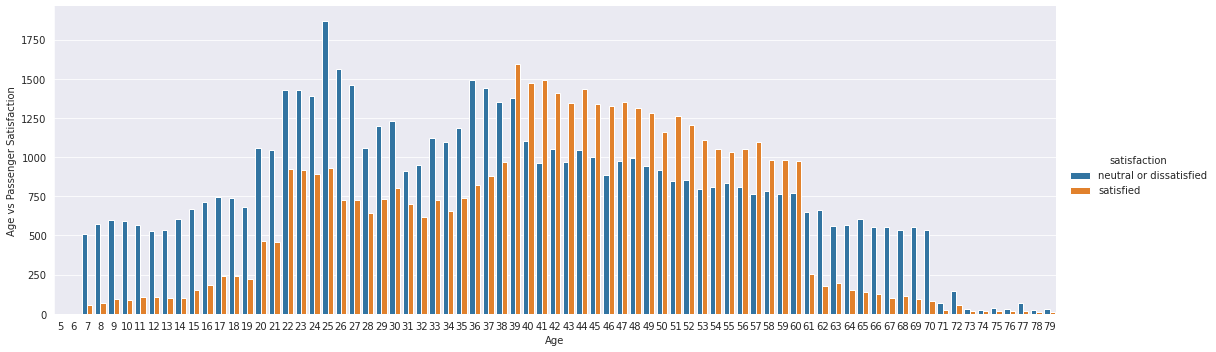

In [ ]:
with sns.axes_style('darkgrid'):
    g = sns.catplot("Age", data=dataset, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

Based on the picture above, it can be seen that in the age range of 7-38 years, most passengers at that age are dissatisfied with the services provided. Meanwhile, in the age range of 39-60 years, most passengers are satisfied with the services provided.

### Analysis of Satisfaction and Gender

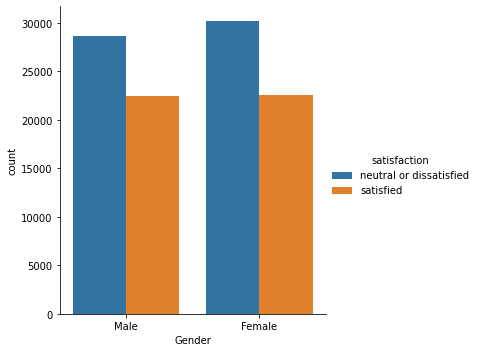

In [ ]:
sns.catplot(x='Gender', data=dataset, kind='count', hue='satisfaction')

In [ ]:
dataset.groupby(["Gender", "satisfaction"]).size()

Gender  satisfaction           
Female  neutral or dissatisfied    30193
        satisfied                  22534
Male    neutral or dissatisfied    28686
        satisfied                  22491
dtype: int64

It has been discovered that the gender-based distribution of dissatisfied and satisfied passengers is nearly same. For both male and female passengers, number of dissatisfied customers are on the higher side compared to number of satisfied customers.

### Analysis of Class, Age and gender towards Satisfaction

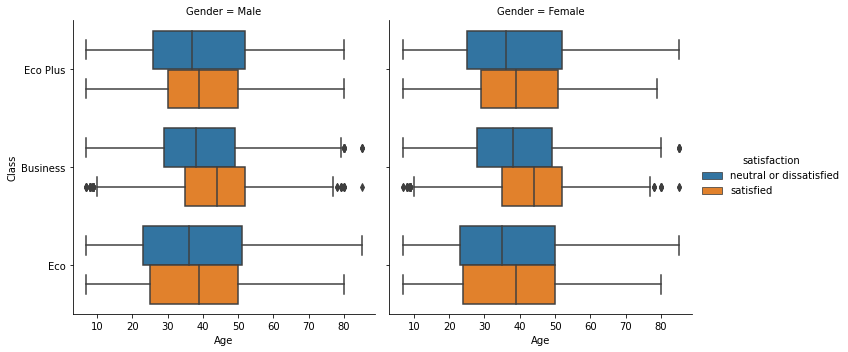

In [ ]:
sns.catplot(x='Age', y='Class', data=dataset, kind='box', hue='satisfaction', col ='Gender')

### Analysis flight distance towards satisfaction

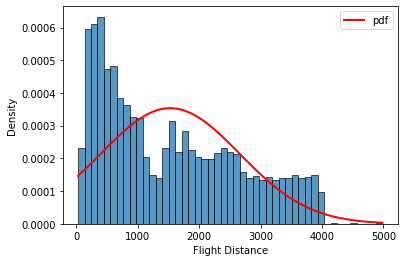

In [ ]:
# Distribusi Flight Distance terhadap Satisfaction

min = satisfaction_1['Flight Distance'].min()
max = satisfaction_1['Flight Distance'].max()
mean = satisfaction_1['Flight Distance'].mean()
std = satisfaction_1['Flight Distance'].std()
x_pdf = np.linspace(min, max)
y_pdf = norm.pdf(x_pdf, mean, std)
sns.histplot(data=satisfaction_1, x='Flight Distance',stat="density")
plt.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')       
plt.legend()                                            
plt.show()

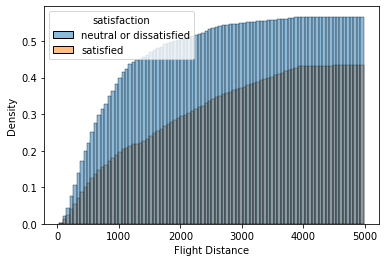

In [ ]:
# Cummulative Density Function (CDF)
sns.histplot(data=dataset, x='Flight Distance',stat="density", cumulative=True, hue='satisfaction')     
plt.xticks                                  
plt.show()

### Analysis of Class and Type of Travel towards Satisfaction

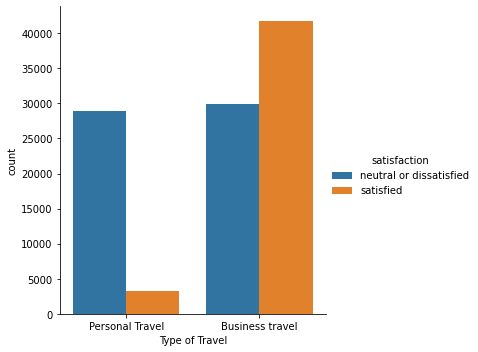

In [ ]:
sns.catplot(x='Type of Travel', data=dataset, kind='count', hue='satisfaction')

In [ ]:
dataset.groupby(["Type of Travel", "satisfaction"]).size()

Type of Travel   satisfaction           
Business travel  neutral or dissatisfied    29909
                 satisfied                  41746
Personal Travel  neutral or dissatisfied    28970
                 satisfied                   3279
dtype: int64

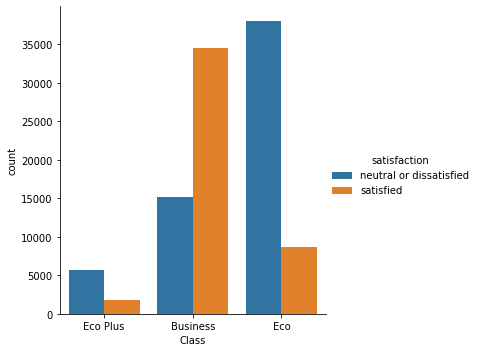

In [ ]:
sns.catplot(x='Class', data=dataset, kind='count', hue='satisfaction')

### Analysis of Departure/Arrival time convenient towards Departure & Arrival Delay in Minutes

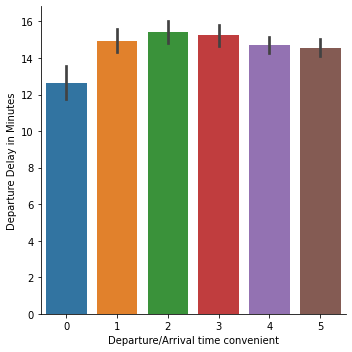

In [ ]:
#melihat nilai kenyamanan penumpang atas penundaan waktu keberangkatan pesawat
sns.catplot(x='Departure/Arrival time convenient', y='Departure Delay in Minutes', data=dataset, kind='bar')

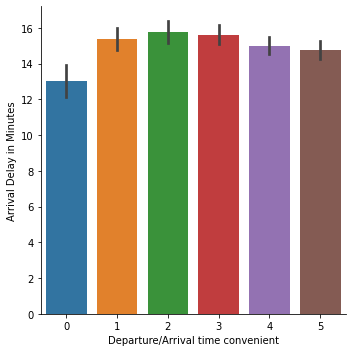

In [ ]:
#melihat nilai kenyamanan penumpang atas penundaan waktu kedatangan pesawat
sns.catplot(x='Departure/Arrival time convenient', y='Arrival Delay in Minutes', data=dataset, kind='bar')

#Multivariate Analysis

###Analysis the satisfaction level of Class with Flight Distance and Type of Travel

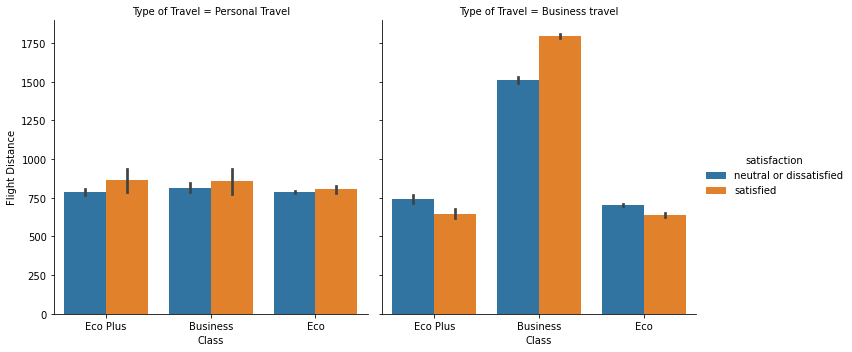

In [ ]:
sns.catplot(x='Class', y='Flight Distance', data=dataset, kind='bar', hue='satisfaction', col='Type of Travel')

Based on the picture above, it can be seen that for business travel in the business class category, the number of satisfied passengers is quite high for longer flight distances. Meanwhile, for the type of trip and other class categories against to distance, it can be seen that the distribution of satisfied and dissatisfied passengers is almost the same.

### Analysis of Class, Departure Delay in Minutes and Departure/Arrival time convenient towards Satisfaction

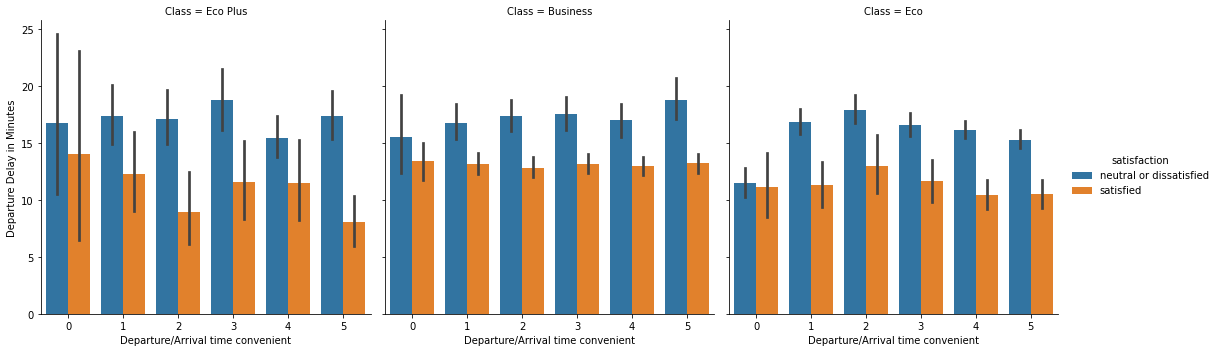

In [ ]:
sns.catplot(x='Departure/Arrival time convenient', y='Departure Delay in Minutes', data=dataset, kind='bar', hue='satisfaction', col='Class') #

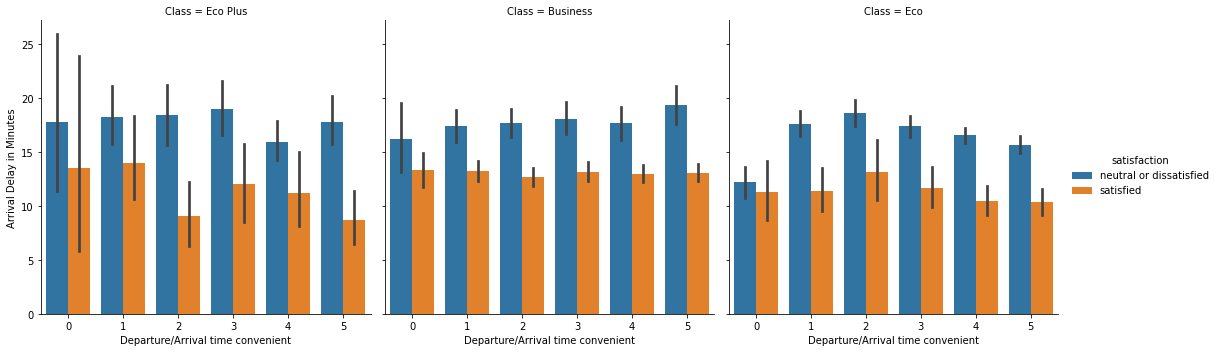

In [ ]:
sns.catplot(x='Departure/Arrival time convenient', y='Arrival Delay in Minutes', data=dataset, kind='bar', hue='satisfaction', col='Class') 

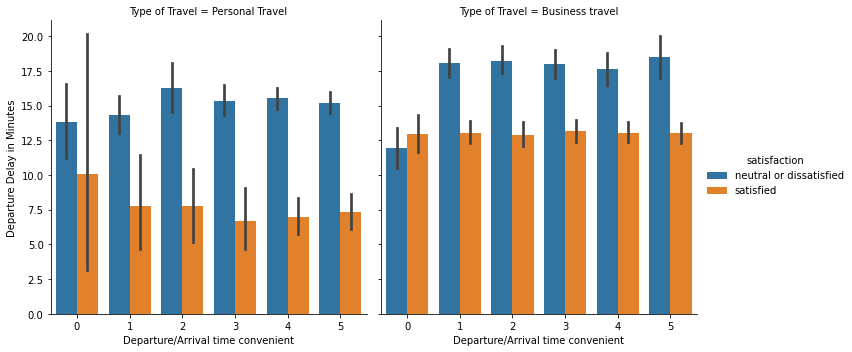

In [ ]:
sns.catplot(x='Departure/Arrival time convenient', y='Departure Delay in Minutes', data=dataset, kind='bar', hue='satisfaction', col='Type of Travel') #

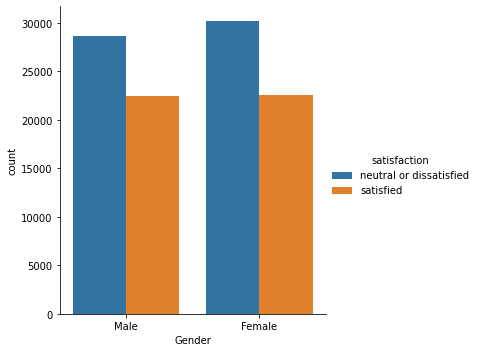

In [ ]:
sns.catplot(x='Gender', data=dataset, kind='count', hue='satisfaction') #

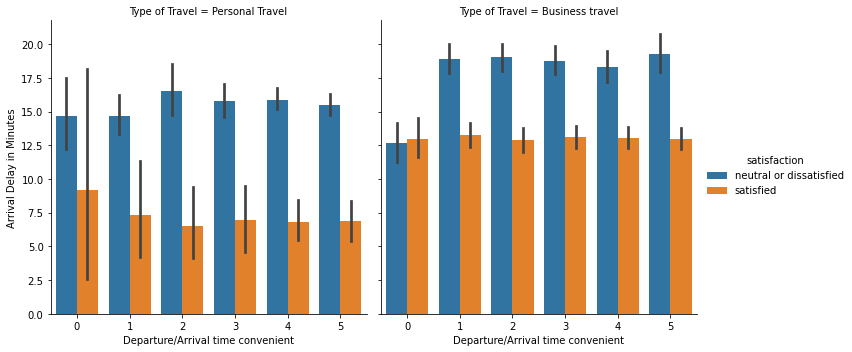

In [ ]:
sns.catplot(x='Departure/Arrival time convenient', y='Arrival Delay in Minutes', data=dataset, kind='bar', hue='satisfaction', col='Type of Travel') #

From 4 visualization we see and get that there is still a chance that the passenger still satisfied eventhough the departure or arrival is delayed, like from the fourth chart, the passenger that give 0 score in 'Departure/Arrival time convenient' in bussiness travel still satisfied even the plane is delayed in arrival

### Departure and Arrival Delay towards Satisfaction

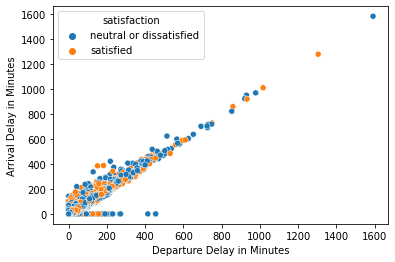

In [ ]:
# Scatter Plot Departure and Arrival Delay terhadap Satisfaction
sns.scatterplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', data=dataset, hue='satisfaction')
plt.show()

from the scatter plot above, variable Arrival Delay and Departure Delay in minutes have highly positive correlation

### Analysis of Baggage Handling, Gate Location and class category towards satisfaction

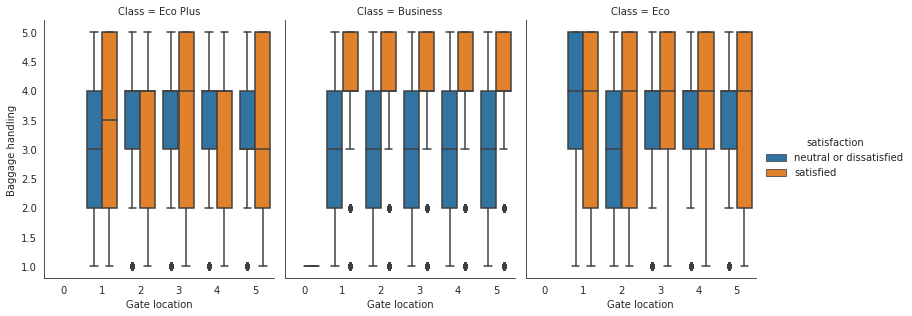

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="Gate location", y="Baggage handling", hue="satisfaction", col="Class", data=dataset, kind="box", height=4.5, aspect=.8)

### On-board service, Leg room service, Cleanliness towards Satisfaction

In [ ]:
import plotly.express as px

fig = px.scatter_3d(dataset.head(1000), x='On-board service', y='Leg room service', z='Cleanliness', 
                   color='satisfaction')
fig.show()

### Finding Outliers and handle it

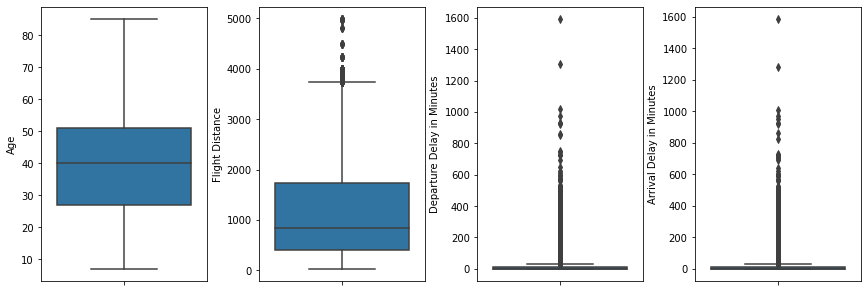

In [ ]:
candidate_outliers = dataset[["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]]

fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize = (12, 4))
idx = 0
axs = axs.flatten()
for k, v in candidate_outliers.items():
    sns.boxplot(y = k, data = candidate_outliers, ax = axs[idx]) #color = "Blues"
    idx += 1
plt.tight_layout(pad = 0.5, w_pad = 0.5, h_pad = 5.0)

In [ ]:
candidate_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Departure Delay in Minutes,103904.0,14.815618,38.230901,0.0,0.0,0.0,12.0,1592.0
Arrival Delay in Minutes,103904.0,15.133392,38.649776,0.0,0.0,0.0,13.0,1584.0


In [ ]:
Q1 = candidate_outliers.quantile(0.25)
Q3 = candidate_outliers.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                             24.0
Flight Distance               1329.0
Departure Delay in Minutes      12.0
Arrival Delay in Minutes        13.0
dtype: float64


There are not outliers in "Age" column. Most passengers were aged between 27 and 51. The youngest one was 7, and the oldest is 85. The averged travelled distance was 1189.45 km. The majority of participants estimated a journey of between 414 and 1743 kilometers. There are extreme figures, such as those above 3900 kilometers. On the second boxplot, these are shown as dots. On the other hand, a large amount of data in "Departure delay" and "Arrival delay" seem to be outliers. Average delay was around 15 minutes but there are people who stated that their plane arrived or departed on the next day (i.e., delay of more than 24 hours).

For the time being, outliers are kept in the dataset.

#Pre-processing Data

In [ ]:
# Menghapus kolom yang tidak digunakan

dataset = dataset.drop(['id'],axis=1)
dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## One hot Encode and Label Encode

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['satisfaction'] = label_encoder.fit_transform(dataset['satisfaction'])
dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
dataset["satisfaction"].unique()

array([0, 1])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['Type of Travel'] = label_encoder.fit_transform(dataset['Type of Travel'])
dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,1,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,0,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,0,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,0,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,0,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['Class'] = label_encoder.fit_transform(dataset['Class'])
dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['Customer Type'] = label_encoder.fit_transform(dataset['Customer Type'])
dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,Male,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,Female,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,Female,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,Male,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
# One Hot Encode karena data categorical nominal 
dataset = pd.get_dummies(dataset, columns=['Gender'], drop_first=True)
dataset.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male
0,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,1
1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,1
2,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,0
3,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,0
4,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,1


##Standardisasi dan Normalisasi


In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.drop(['satisfaction'], axis=1)
y = dataset['satisfaction']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male
0,2.115103,-0.952878,-0.669448,-0.954884,-0.600675,0.956316,0.617626,0.887235,0.017003,-0.907426,0.553738,-1.096009,-1.022557,1.255016,1.251679,0.310496,0.548153,1.156311,-0.983573,-0.387027,-0.390679,-0.986366
1,-0.472790,-2.144383,-0.669448,-0.954884,0.247906,1.709937,1.273866,1.602182,1.583868,-0.907426,-0.928537,-1.096009,-1.022557,-0.295979,-0.270045,0.310496,0.548153,0.305810,-0.983573,-0.387027,-0.390679,1.013822
2,-0.472790,-0.555710,1.493767,0.655896,-0.266659,-0.550925,-0.038613,-0.542659,0.800436,-0.907426,-0.928537,-1.096009,-1.022557,-1.071476,-0.270045,0.310496,-1.824115,0.305810,-0.983573,0.817358,0.955458,-0.986366
3,-0.472790,1.562521,1.493767,0.655896,0.309092,0.956316,1.273866,0.172288,0.017003,1.350400,-0.187400,0.421915,-1.022557,-1.071476,-0.270045,-1.383643,0.548153,-1.395194,0.541100,-0.387027,-0.390679,-0.986366
4,2.115103,-1.283852,-0.669448,0.655896,-0.724050,0.956316,-0.038613,0.172288,0.800436,-1.660034,-0.187400,-1.854971,-1.773376,0.479518,-1.791769,-0.536574,-0.242603,0.305810,-1.745909,1.079180,1.188444,-0.986366


# Building Models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# evaluation metrics
def classification_eval (aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    
    accuracy = round((tp+tn) / (tp+tn+fp+fn) * 100, 2)
    precision = round((tp) / (tp+fp) * 100, 2)
    recall = round((tp) / (tp+fn) * 100, 2)
    specificity = round((tn) / (tn+fp) * 100, 2)
    F1 = round( (2 * precision * recall) / (precision + recall) *100, 2)
    
    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')
    print('Specificity :', specificity, '%')
    print('F1 Score : ', F1, '%') 

## Decision Trees

In [ ]:
dectree = DecisionTreeClassifier(max_depth=7)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [ ]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

In [ ]:
pd.DataFrame(y_test_pred, columns=['satisfaction'])

,satisfaction
0,1
1,0
2,1
3,0
4,0
...,...
20776,0
20777,0
20778,0
20779,0


In [ ]:
classification_eval(y_train, y_train_pred, 'Decision Tree Training')

Evaluation Model: Decision Tree Training
[[44991  2045]
 [ 3643 32444]]
Accuracy   : 93.16 %
Precision  : 94.07 %
Recall     : 89.9 %
Specificity : 95.65 %
F1 Score :  9193.77 %


In [ ]:
target_names = ['dissatisfied', 'satisfied']
report_train = classification_report(y_train, y_train_pred, target_names=target_names)
print(report_train)

              precision    recall  f1-score   support

dissatisfied       0.93      0.96      0.94     47036
   satisfied       0.94      0.90      0.92     36087

    accuracy                           0.93     83123
   macro avg       0.93      0.93      0.93     83123
weighted avg       0.93      0.93      0.93     83123



In [ ]:
classification_eval(y_test, y_test_pred, 'Decision Tree Testing')

Evaluation Model: Decision Tree Testing
[[11303   540]
 [  923  8015]]
Accuracy   : 92.96 %
Precision  : 93.69 %
Recall     : 89.67 %
Specificity : 95.44 %
F1 Score :  9163.59 %


In [ ]:
target_names = ['dissatisfied', 'satisfied']
report_test = classification_report(y_test, y_test_pred, target_names=target_names)
print(report_test)

              precision    recall  f1-score   support

dissatisfied       0.92      0.95      0.94     11843
   satisfied       0.94      0.90      0.92      8938

    accuracy                           0.93     20781
   macro avg       0.93      0.93      0.93     20781
weighted avg       0.93      0.93      0.93     20781



## K-Nearest Neighbor

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [ ]:
classification_eval(y_train, y_train_pred, 'KNN Training')

Evaluation Model: KNN Training
[[45906  1130]
 [ 3575 32512]]
Accuracy   : 94.34 %
Precision  : 96.64 %
Recall     : 90.09 %
Specificity : 97.6 %
F1 Score :  9325.01 %


In [ ]:
target_names = ['dissatisfied', 'satisfied']
report_train = classification_report(y_train, y_train_pred, target_names=target_names)
print(report_train)

              precision    recall  f1-score   support

dissatisfied       0.93      0.98      0.95     47036
   satisfied       0.97      0.90      0.93     36087

    accuracy                           0.94     83123
   macro avg       0.95      0.94      0.94     83123
weighted avg       0.94      0.94      0.94     83123



In [ ]:
classification_eval(y_test, y_test_pred, 'KNN Testing')

Evaluation Model: KNN Testing
[[11432   411]
 [ 1125  7813]]
Accuracy   : 92.61 %
Precision  : 95.0 %
Recall     : 87.41 %
Specificity : 96.53 %
F1 Score :  9104.71 %


In [ ]:
target_names = ['dissatisfied', 'satisfied']
report_test = classification_report(y_test, y_test_pred, target_names=target_names)
print(report_test)

              precision    recall  f1-score   support

dissatisfied       0.91      0.97      0.94     11843
   satisfied       0.95      0.87      0.91      8938

    accuracy                           0.93     20781
   macro avg       0.93      0.92      0.92     20781
weighted avg       0.93      0.93      0.93     20781



## Random Forest

In [ ]:
ranfor = RandomForestClassifier(max_depth=7)
ranfor.fit(X_train, y_train)

RandomForestClassifier(max_depth=7)

In [ ]:
y_train_pred = ranfor.predict(X_train)
y_test_pred = ranfor.predict(X_test)

In [ ]:
classification_eval(y_train, y_train_pred, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[44627  2409]
 [ 3004 33083]]
Accuracy   : 93.49 %
Precision  : 93.21 %
Recall     : 91.68 %
Specificity : 94.88 %
F1 Score :  9243.87 %


In [ ]:
target_names = ['dissatisfied', 'satisfied']
report_train = classification_report(y_train, y_train_pred, target_names=target_names)
print(report_train)

              precision    recall  f1-score   support

dissatisfied       0.94      0.95      0.94     47036
   satisfied       0.93      0.92      0.92     36087

    accuracy                           0.93     83123
   macro avg       0.93      0.93      0.93     83123
weighted avg       0.93      0.93      0.93     83123



In [ ]:
classification_eval(y_test, y_test_pred, 'Random Forest testing')

Evaluation Model: Random Forest testing
[[11220   623]
 [  801  8137]]
Accuracy   : 93.15 %
Precision  : 92.89 %
Recall     : 91.04 %
Specificity : 94.74 %
F1 Score :  9195.57 %


In [ ]:
target_names = ['dissatisfied', 'satisfied']
report_test = classification_report(y_test, y_test_pred, target_names=target_names)
print(report_test)

              precision    recall  f1-score   support

dissatisfied       0.93      0.95      0.94     11843
   satisfied       0.93      0.91      0.92      8938

    accuracy                           0.93     20781
   macro avg       0.93      0.93      0.93     20781
weighted avg       0.93      0.93      0.93     20781



#Validation Technique

##Cross Validation

### Cross Validation Decision Tree

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

dt=DecisionTreeClassifier(random_state=42)
kfold = KFold(10, shuffle=True)
scores = cross_validate(dt, X, y, cv=kfold, scoring=['accuracy','precision','recall', 'f1'])

print('Accuracy : ',scores['test_accuracy'].mean())    
print('Precision : ',scores['test_precision'].mean())  
print('Recall/ sensitivity : ',scores['test_recall'].mean()) 
print('F1 : ',scores['test_f1'].mean()) 

Accuracy :  0.9465083271050899
Precision :  0.9361765579026109
Recall/ sensitivity :  0.9406916671808732
F1 :  0.9384191581559925


### Cross Validation Random Forest

In [ ]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

dt=RandomForestClassifier(random_state=42)
kfold = KFold(10, shuffle=True)
scores = cross_validate(dt, X, y, cv=kfold, scoring=['accuracy','precision','recall', 'f1'])

print('Accuracy : ',scores['test_accuracy'].mean())    
print('Precision : ',scores['test_precision'].mean())  
print('Recall/ sensitivity : ',scores['test_recall'].mean()) 
print('F1 : ',scores['test_f1'].mean()) 

Accuracy :  0.9624076426914572
Precision :  0.9726571732201854
Recall/ sensitivity :  0.9396525535377916
F1 :  0.9558658951064576


#Model Selection

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline, make_pipeline
#from imblearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Construct some pipelines
pipe_dt = Pipeline(steps=[('scaling',StandardScaler()), 
                          ('classifier', DecisionTreeClassifier
                           (random_state=42, max_depth=15, criterion='gini'))])
pipe_knn = Pipeline(steps=[('scaling',StandardScaler()), 
                          ('classifier', KNeighborsClassifier())])
pipe_lr = Pipeline(steps=[('scaling',StandardScaler()), 
                          ('classifier', LogisticRegression(random_state=42))])
pipe_rf = Pipeline(steps=[('scaling',StandardScaler()), 
                          ('classifier', RandomForestClassifier(random_state=42))])
pipe_svc = Pipeline(steps=[('scaling',StandardScaler()), 
                          ('classifier', SVC(random_state=42))])
pipe_bag = Pipeline(steps=[('scaling',StandardScaler()), 
                          ('classifier', BaggingClassifier(random_state=42))])


pipes = [pipe_dt, pipe_knn, pipe_lr, pipe_rf, pipe_svc, pipe_bag]
names_pipes = ['DT','KNN','LR','RF','SVM','Bagging']

for i in range(len(pipes)):
  print(names_pipes[i])
  pipes[i].fit(X_train, y_train)
  y_pred = pipes[i].predict(X_test)
  print('Accuracy : ',accuracy_score(y_test, y_pred))    
  print('Precision : ',precision_score(y_test, y_pred, average='binary'))  
  print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='binary')) 
  print('F1 : ',f1_score(y_test, y_pred, average='binary')) 
  #sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='binary')
  #print('Specificity : ',spec)
  print('--------')
  print('')



DT
Accuracy :  0.9514307712049275
Precision :  0.9584817031593302
Recall/ sensitivity :  0.9290592641551002
F1 :  0.943541169451074
--------

KNN
Accuracy :  0.9266649557295008
Precision :  0.9501072535155319
Recall/ sensitivity :  0.8782404347506793
F1 :  0.9127614104716838
--------

LR
Accuracy :  0.8755614012575388
Precision :  0.8736187845303868
Recall/ sensitivity :  0.8360872438863186
F1 :  0.8544410672070247
--------

RF
Accuracy :  0.9615359938406262
Precision :  0.9728144989339019
Recall/ sensitivity :  0.9381655283836381
F1 :  0.9551758944259598
--------

SVM
Accuracy :  0.9530989349416142
Precision :  0.9590603519903316
Recall/ sensitivity :  0.9324373944334288
F1 :  0.9455615132558832
--------

Bagging
Accuracy :  0.9577505453612216
Precision :  0.969179127250534
Recall/ sensitivity :  0.9329514577366527
F1 :  0.9507202993451823
--------



#Feature Selection

##Univariate analysis

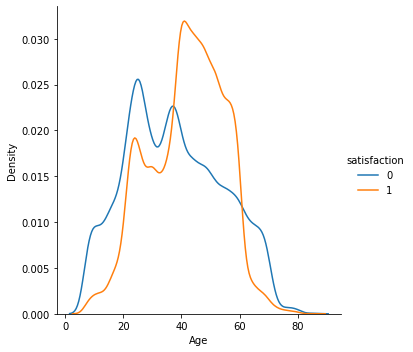

In [ ]:
sns.FacetGrid(dataset, hue='satisfaction', height=5).map(sns.kdeplot, 'Age').add_legend()
plt.show()

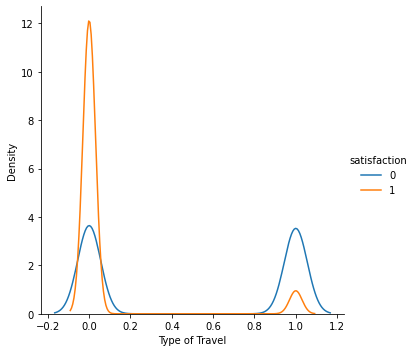

In [ ]:
sns.FacetGrid(dataset, hue='satisfaction', height=5).map(sns.kdeplot, 'Type of Travel').add_legend()
plt.show()

## Correlation

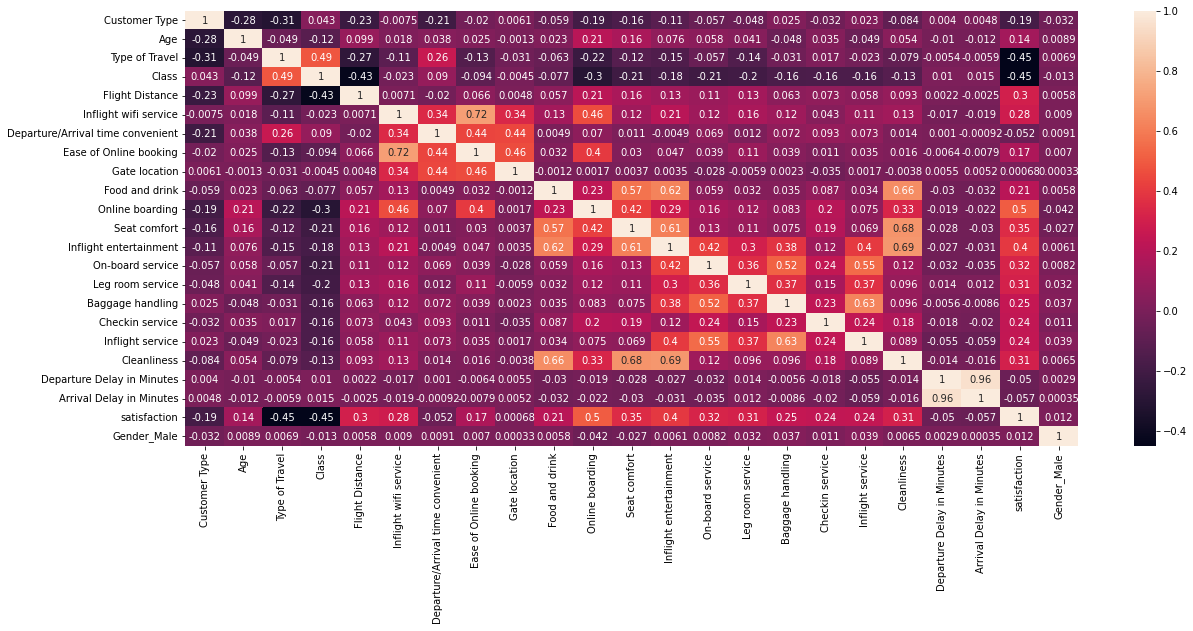

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

#Feature Importance

In [ ]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0))
selector.fit(X_test, y_test_pred)
support = selector.get_support()
features = X_test.loc[:,support].columns.tolist()
print(features)
print(RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train).feature_importances_)

ValueError: ignored

So only these six features are inherently important in contributing towards passenger satisfaction.